# Import Libraries

In [3]:
import speech_recognition as sr #Import the speech recognition library

import os # obtain path to AudioFile in the same folder as this script
from os import path

import pydub #Manipulate audio with an simple and easy high level interface.
from pydub import AudioSegment

import numpy as np
import wave
import matplotlib.pyplot as plt

# Load Audio File

In [4]:
Audio_File_Name = "ex3_stereo_call.wav"

In [5]:
# Create function to convert audio file to wav
def convert_to_wav(filename):
    #Takes an audio file of non .wav format and converts to .wav
  # Import audio file
    audio = AudioSegment.from_file(filename)
  # Create new filename
    new_filename = filename.split(".")[0] + ".wav"
  # Export file as .wav
    audio.export(new_filename, format="wav")
    print(f"Converting {filename} to {new_filename}...")

In [6]:
if Audio_File_Name.split(".")[1] == "wav":
    AUDIO_FILE = os.path.join(os.path.dirname(os.path.realpath('__file__')), Audio_File_Name) #Load audio file
else:
    convert_to_wav(Audio_File_Name)
    AUDIO_FILE = os.path.join(os.path.dirname(os.path.realpath('__file__')), Audio_File_Name.split(".")[0]+".wav") #Load audio file
print(AUDIO_FILE)

C:\Users\Alrayan\Desktop\ai-capstone-speach-to-text\ex3_stereo_call.wav


In [7]:
wav_file = AudioSegment.from_file(AUDIO_FILE) # open wav file

---
# Exploratory Data Analysis
---

### Audio Stats

In [8]:
def show_pydub_stats(filename):
    """Returns different audio attributes related to an audio file."""
    # Create AudioSegment instance
    audio_segment = AudioSegment.from_file(filename)
    # Print audio attributes and return AudioSegment instance
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Max amplitude: {audio_segment.max}")
    print(f"Length (ms): {len(audio_segment)}")
    return audio_segment

In [9]:
show_pydub_stats(AUDIO_FILE)

Channels: 2
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 4
Max amplitude: 23730
Length (ms): 45500


### Visualizing Sound Wave

C:\Users\Alrayan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


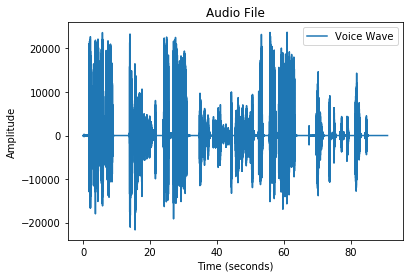

In [10]:
# Read in sound wave and convert from bytes to integers
file = wave.open(AUDIO_FILE, 'r')
signal = file.readframes(-1)
soundwave = np.frombuffer(signal, dtype='int16')

time = np.linspace(start=0,
                      stop=len(soundwave)/wav_file.frame_rate,
                      num=len(soundwave))
# Setup the title and axis titles
plt.title('Audio File')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio file data to the plot
plt.plot(time, soundwave, label='Voice Wave')
plt.legend()
plt.show()

---
# Pre-processing & Adjusting Audio Files
---

Each API has its own requirements. This section is to preprocess and adjust audio file before performing the speech recognition

#### Splitting stereo audio to mono with PyDub

In [33]:
if wav_file.channels >1:
    # Split stereo phone call and check channels
    channels = wav_file.split_to_mono()
    i=1
    # Save new channels separately
    ch = wav_file.channels
    for channel in channels:
        phone_call_filename = "phone_call_channel"+str(i)
        # Export file as .wav
        channel.export(out_f=phone_call_filename+'.wav', format='wav')
        i+=1

In [26]:
channels[1]

---
# Recognize speech using Google Speech Recognition
---

In [46]:
def transcribe_audio(filename):
    """Takes a .wav format audio file and transcribes it to text."""
    # Setup a recognizer instance
    recognizer = sr.Recognizer()
    # Import the audio file and convert to audio data
    audio_file = sr.AudioFile(filename)
    with audio_file as source:
        audio_data = recognizer.record(source)
    # Return the transcribed text
    return recognizer.recognize_google(audio_data)

In [47]:
transcribe_audio(AUDIO_FILE)

"hello this is Daniel from Acme Studios how can I best help you I was just wondering if I could get some support yeah sure thing what's your name and what's wrong with your device and not one of large some of my my my farts okay nice to meet you Josh what's the serial number of your device so I can track it damn the serial number is 176-4588"